In [58]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [59]:
data = pd.read_csv("./clustering.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [60]:
X = data[["ApplicantIncome","LoanAmount"]]
X.head()

,ApplicantIncome,LoanAmount
0,4583,128.0
1,3000,66.0
2,2583,120.0
3,6000,141.0
4,2333,95.0


In [61]:
K = 3

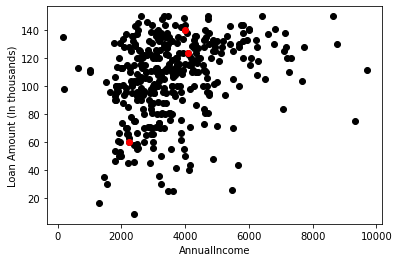

In [66]:
Centroids = (X.sample(n = K))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In thousands)')
plt.show()

In [67]:
# def centroids(x1,x2,y1,y2):
#     # d = math.sqrt((x2-x1)**2+(y2-y1)**2)
#     dist = numpy.linalg.norm(a-b)
#     print(dist)

In [68]:
diff = 1
j=0

while(diff!=0):
    XD = X
    i = 1
    for index1, row_c in Centroids.iterrows():
        ED = []
        for index2, row_d in XD.iterrows():
            d1 = (row_c["ApplicantIncome"] - row_d["ApplicantIncome"])**2
            d2 = (row_c["LoanAmount"] - row_d["LoanAmount"])**2
            d = np.sqrt(d1 + d2)
            ED.append(d)
        X[i] = ED
        i = i + 1
    C = []
    for index, row in X.iterrows():
        min_dist = row[1]
        pos = 1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i + 1
        C.append(pos)
    X["Cluster"] = C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff = 1
        j = j + 1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

/tmp/ipykernel_4882/725355675.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = ED
/tmp/ipykernel_4882/725355675.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = ED
/tmp/ipykernel_4882/725355675.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

317.6480503413169
229.33320262473552
331.4605893918266
248.0154134267727
218.24897861156342
107.07928213052429


/tmp/ipykernel_4882/725355675.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = ED
/tmp/ipykernel_4882/725355675.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"] = C
/tmp/ipykernel_4882/725355675.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

52.84741626127729
98.54724443834282
90.64953219227577
18.274686272279013
9.21023994083339
18.345487493007468
46.27013250786139
0.0


/tmp/ipykernel_4882/725355675.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"] = C
/tmp/ipykernel_4882/725355675.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = ED
/tmp/ipykernel_4882/725355675.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [69]:
X.head()

,ApplicantIncome,LoanAmount,1,2,3,Cluster
0,4583,128.0,1929.786213,549.706662,2085.250941,2
1,3000,66.0,3513.174648,1034.521934,503.013025,3
2,2583,120.0,3929.767475,1450.632322,87.961117,3
3,6000,141.0,513.218472,1966.652040,3502.297968,1
4,2333,95.0,4179.839177,1700.660175,164.991055,3


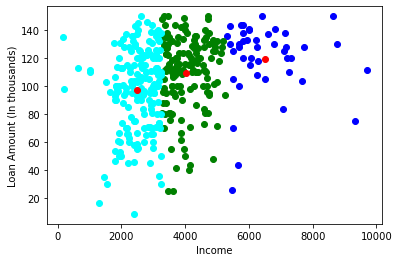

In [70]:
color = ['blue', 'green', 'cyan']
for k in range(K):
    data = X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c = color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In thousands)')
plt.show()